## Librerías

In [105]:
%run common.ipy
from functions import *
%run functions.py
import warnings
warnings.filterwarnings("ignore")

## Carga y Análisis Exploratorio

#### Carga de datos 

In [2]:
# Datos
df= get_data()
df.head(2)

,heat_num,grado,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,...,MgO,sio2,al2o3,mno,s,fe2o3,ib2,ib4,feo,IB3
0,462896,251046-6DEA,2,170.541000,44.766666,34.683334,4.266666,4.816666,45935,95.54000092,...,6.88412,24.72454,3.70284,0.22302,4.150650,0.83426,2.956608,2.857252,0.751542,2.179196
1,462897,251028 DEA,2,182.727005,68.349998,43.283333,6.506666,17.560000,56505,92.5,...,7.12602,26.15234,2.65618,0.10148,4.856408,0.56522,2.830938,2.861736,0.509170,2.177890


In [3]:
tamaño_dataset(df)

La bd tiene 106 columnas y 5,384 registros


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Columns: 106 entries, heat_num to IB3
dtypes: float64(90), int64(11), object(5)
memory usage: 4.4+ MB


In [5]:
df.describe()

,heat_num,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,O2,Grafito,Cal_Total,...,MgO,sio2,al2o3,mno,s,fe2o3,ib2,ib4,feo,IB3
count,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5381.000000,5350.000000,5384.000000,5384.000000,5384.000000,...,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000,5384.000000
mean,476158.015602,1.996285,182.842169,58.406491,39.852299,7.100426,10.664531,5189.237324,3830.006036,6051.799406,...,7.997194,19.648034,7.839413,5.744824,0.980944,28.131705,2.486805,2.115265,25.343878,1.497955
std,7588.100105,0.081694,3.972887,26.624815,3.666048,2.597863,23.873994,535.055076,1539.268391,950.467479,...,1.983953,5.300193,2.880700,3.053075,1.730592,16.742673,0.348789,0.402037,15.083488,0.358317
min,462896.000000,1.000000,97.305000,-569.866699,11.883333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200600,5.947200,0.542800,0.047200,0.011800,-0.731600,1.053622,1.011142,-0.659148,0.814879
25%,469863.750000,2.000000,181.703747,48.649998,37.799999,6.066666,2.133332,4933.750000,2756.250000,5919.000000,...,6.844000,16.107000,6.490000,5.590250,0.118000,21.151500,2.260260,1.848057,19.055436,1.259514
50%,476218.000000,2.000000,183.404007,52.683329,39.199998,6.300000,4.716666,5227.500000,3402.500000,6066.000000,...,7.776200,17.641000,8.525500,7.056400,0.153400,33.252400,2.475345,2.011841,29.957132,1.399668
75%,483703.250000,2.000000,185.095995,59.414163,40.866665,7.216666,10.133332,5482.500000,4699.062500,6266.000000,...,8.868290,20.322550,9.723200,7.693600,0.259600,39.754200,2.661284,2.282739,35.814534,1.639863
max,487404.000000,3.000000,190.561996,567.136658,70.149994,50.283333,501.103337,10117.500000,22183.750000,25078.000000,...,27.104600,38.429060,18.620400,12.590600,37.506536,77.526000,5.126510,4.007044,69.843256,3.294944


#### Exploración de datos 

#####  Se tienen datos perdidos en varias variables y 5 variables de tipo object

In [6]:
# Se revisan los datos que guardan las 5 variables tipo object para definir la mejor estrategia de transformación
objetos = Objetos()
objetos.cuenta_objetos(df, get_object(df))

Datos de la columna: grado
251036 DEA              2465
25102-2A                 383
251028-DEA               293
251036 PRDEA             269
251015 VARDEA            232
251046-6DEA              196
25A-36DEA                165
251044 PTADEA            160
2510088 VDEDEA           158
251028 DEA               124
251048 VDEA              109
2510088 DEA               69
25A630DEA                 64
251028-G40DEA             58
251025-5VRDEA             56
251018 DEA                51
25A529 50 PDEA            49
251008 BCODEA             46
251039 VARDEA             45
251038-10VDEA             37
251004 MBDEA              28
251008 DEA                27
251004 CELDEA             26
251020-6VDEA              25
251008 -INDDEA            22
251004 FWDEA              22
251522-BDEA               20
251005DEA                 20
25GA-G42DEA               20
251527 DEA                19
25A-36 G5DEA              18
251008 AMADEA             18
25PRUEBASDEA              10
251045DEA       

##### Las variables de tipo objeto tienen datos no válidos como el de #¡VALOR!, por lo que requerirán eliminarse y reemplazarse por Nan

In [7]:
# Visualizamos el porcentaje de datos perdidos por variable, con una función que arroja un dato como muestra de cada variable, su tipo de dato y el 
# porcentaje de perdidos en el conjunto de datos
resumen(df)

,muestra,tipo de dato,porcentaje datos perdidos
cga_met_3,0.0,float64,53.417533
c2_tco_tpo_con,NaN,float64,6.500743
c2_tco_kwh,NaN,float64,6.500743
c2_tco_mw_prom,NaN,float64,6.500743
c1_tco_mw_prom,86.0,float64,4.401932
...,...,...,...
CH31,7.906,float64,0.000000
CH15,0.0,float64,0.000000
CH11,0.0,float64,0.000000
CH10,16.368,float64,0.000000


##### Solamente la variable "cga_met_3" tiene más del 50% de datos perdidos, por lo tanto la estrategia será sacarla del dataset de análisis, 
##### para las demás variables se revisarán sus boxplot como ayuda visual para considerar reemplazar los perdidos por la media o mediana, según la dispersión de sus datos

#### Visualización inicial de la dispersión de las variables del dataset

In [8]:
BoxPlot(df,1).bp

<bound method BoxPlot.bp of <__main__.BoxPlot object at 0x0000017A306F4BB0>>

##### Se observan outliers y presencia de datos negativos en algunas variables

In [9]:
# Contamos cuántos datos negativos hay en cada variable numérica para decidir su tratamiento
nc = ContarNegativos()
df_neg=nc.cuenta_neg(df)
df_neg

{'Time_Vac_Vac': 1,
 'c1_tco_kwh': 142,
 'c1_tco_mw_prom': 142,
 'c2_tco_kwh': 2,
 'c2_tco_mw_prom': 2,
 'c7_tco_kwh': 7,
 'c7_tco_mw_prom': 69,
 'fe2o3': 8,
 'feo': 8}

In [10]:
# Verificación de si el número de colada es único o se repite para que sirva como id
get_unique(df)

Se tienen 482 registros con el mismo número de colada


##### Dado que existen registros duplicados, estos serán eliminados de la bd y se creará un id para identificar de manera única a cada registro

## Limpieza y conformación del nuevo dataset

In [11]:
# Verificamos si los registros con el mismo número de colada están realmente duplicados o tienen algunos campos con valores distintos 
# Si están duplicados en todos sus campos, se eliminarán y se generará un nuevo dataset con un identificador único por registro
# También se reemplazarán los datos que tienen el eror #¡VALOR! por NaN para poder reemplazarlos posteriormente por la media o mediana

df_limpia=Cleaner(df)
df_limpia.cuenta_duplicados()
nuevo_df=df_limpia.remueve_duplicados()
df_nuevo(nuevo_df)
df_limpia=Cleaner(nuevo_df)
nuevo_df=df_limpia.crea_id() # porque el número de colada está repetido
nuevo_df=df_limpia.substituye() # #¡Valor! por NaN
nuevo_df['nuevo_grado']=df_limpia.separa() # para limpiar la columna grado de acero

Hay 18 registros duplicados en el conjunto de datos
Se han eliminado los registros duplicados
El nuevo conjunto de datos tiene 5,366 registros únicos y 106 columnas


In [12]:
nuevo_df.head(2)

,id,heat_num,grado,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,...,sio2,al2o3,mno,s,fe2o3,ib2,ib4,feo,IB3,nuevo_grado
0,1,462896,251046-6DEA,2,170.541000,44.766666,34.683334,4.266666,4.816666,45935,...,24.72454,3.70284,0.22302,4.150650,0.83426,2.956608,2.857252,0.751542,2.179196,251046
1,2,462897,251028 DEA,2,182.727005,68.349998,43.283333,6.506666,17.560000,56505,...,26.15234,2.65618,0.10148,4.856408,0.56522,2.830938,2.861736,0.509170,2.177890,251028


In [13]:
# Se convierten las variables de tipo objeto a tipo flotante para poder obtener estadísticas descriptivas
# La variable cga_met_3 que guarda las toneladas de chatarra en la tercera carga, será descartada por tener más del 50% de datos perdidos
# Las variables que tengan registros con datos negativos, serán cambiados a positivos
# Las variables con datos perdidos serán completadas con la mediana. Se elige mediana sobre la muestra para contrarrestar tanta dispersión de los datos

pipeline = Pipeline([
    ('objeto_a_flotante', Flotante()),
    ('quita_columna', Quita()),
    ('cambia_negativos', CambiaNegativos()),
    ('nulos_por_mediana', Mediana()),
])

# mostrar el nuevo resumen resultante del pipeline
df_procesado=pipeline.fit_transform(nuevo_df)
resumen(df_procesado)


,muestra,tipo de dato,porcentaje datos perdidos
id,1.000,int64,0.0
CH08_C2,29.040,float64,0.0
CH06_C2,0.000,float64,0.0
CH05_C2,0.000,float64,0.0
CH04_C2,0.000,float64,0.0
...,...,...,...
CH05,0.000,float64,0.0
CH04,0.000,float64,0.0
CH03,37.895,float64,0.0
CH02,0.000,float64,0.0


In [14]:
# Vemos las estadísticas descriptivas tras aplicar las transformaciones
df_procesado.describe()

,id,heat_num,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,...,sio2,al2o3,mno,s,fe2o3,ib2,ib4,feo,IB3,nuevo_grado
count,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,...,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5366.000000,5.366000e+03
mean,2683.500000,476136.950615,1.996459,182.838949,58.631786,39.850422,7.101595,10.639830,53880.510622,96.504917,...,19.623888,7.853175,5.761403,0.971964,28.220757,2.485387,2.112967,25.424104,1.495687,3.307304e+05
std,1549.175103,7591.641226,0.080692,3.974789,26.190629,3.666914,2.596946,23.838288,3939.663724,3.448405,...,5.288885,2.871562,3.042661,1.724804,16.695890,0.347410,0.399827,15.041341,0.355971,4.628317e+05
min,1.000000,462896.000000,1.000000,97.305000,16.933336,11.883333,0.000000,0.000000,3245.000000,77.870003,...,5.947200,0.542800,0.047200,0.011800,0.127440,1.053622,1.011142,0.114814,0.814879,2.510200e+04
25%,1342.250000,469831.500000,2.000000,181.702248,48.649998,37.799999,6.066666,2.137500,51835.000000,94.680000,...,16.107000,6.525400,5.664000,0.118000,21.653000,2.260083,1.847320,19.507199,1.259149,2.510280e+05
50%,2683.500000,476177.000000,2.000000,183.404999,52.683331,39.200000,6.300000,4.716666,53185.000000,96.370003,...,17.629200,8.531400,7.056400,0.153400,33.287800,2.473988,2.011428,29.988992,1.398845,2.510360e+05
75%,4024.750000,483710.500000,2.000000,185.095998,59.415828,40.866664,7.216666,10.099999,55012.500000,98.379997,...,20.142600,9.723200,7.705400,0.259600,39.777800,2.659189,2.278521,35.835892,1.633472,2.510360e+05
max,5366.000000,487404.000000,3.000000,190.561996,569.866699,70.149994,50.283333,501.103337,87935.000000,110.010002,...,38.429060,18.620400,12.590600,37.506536,77.526000,5.126510,4.007044,69.843256,3.294944,2.515277e+06


#### Visualización con primeras transformaciones

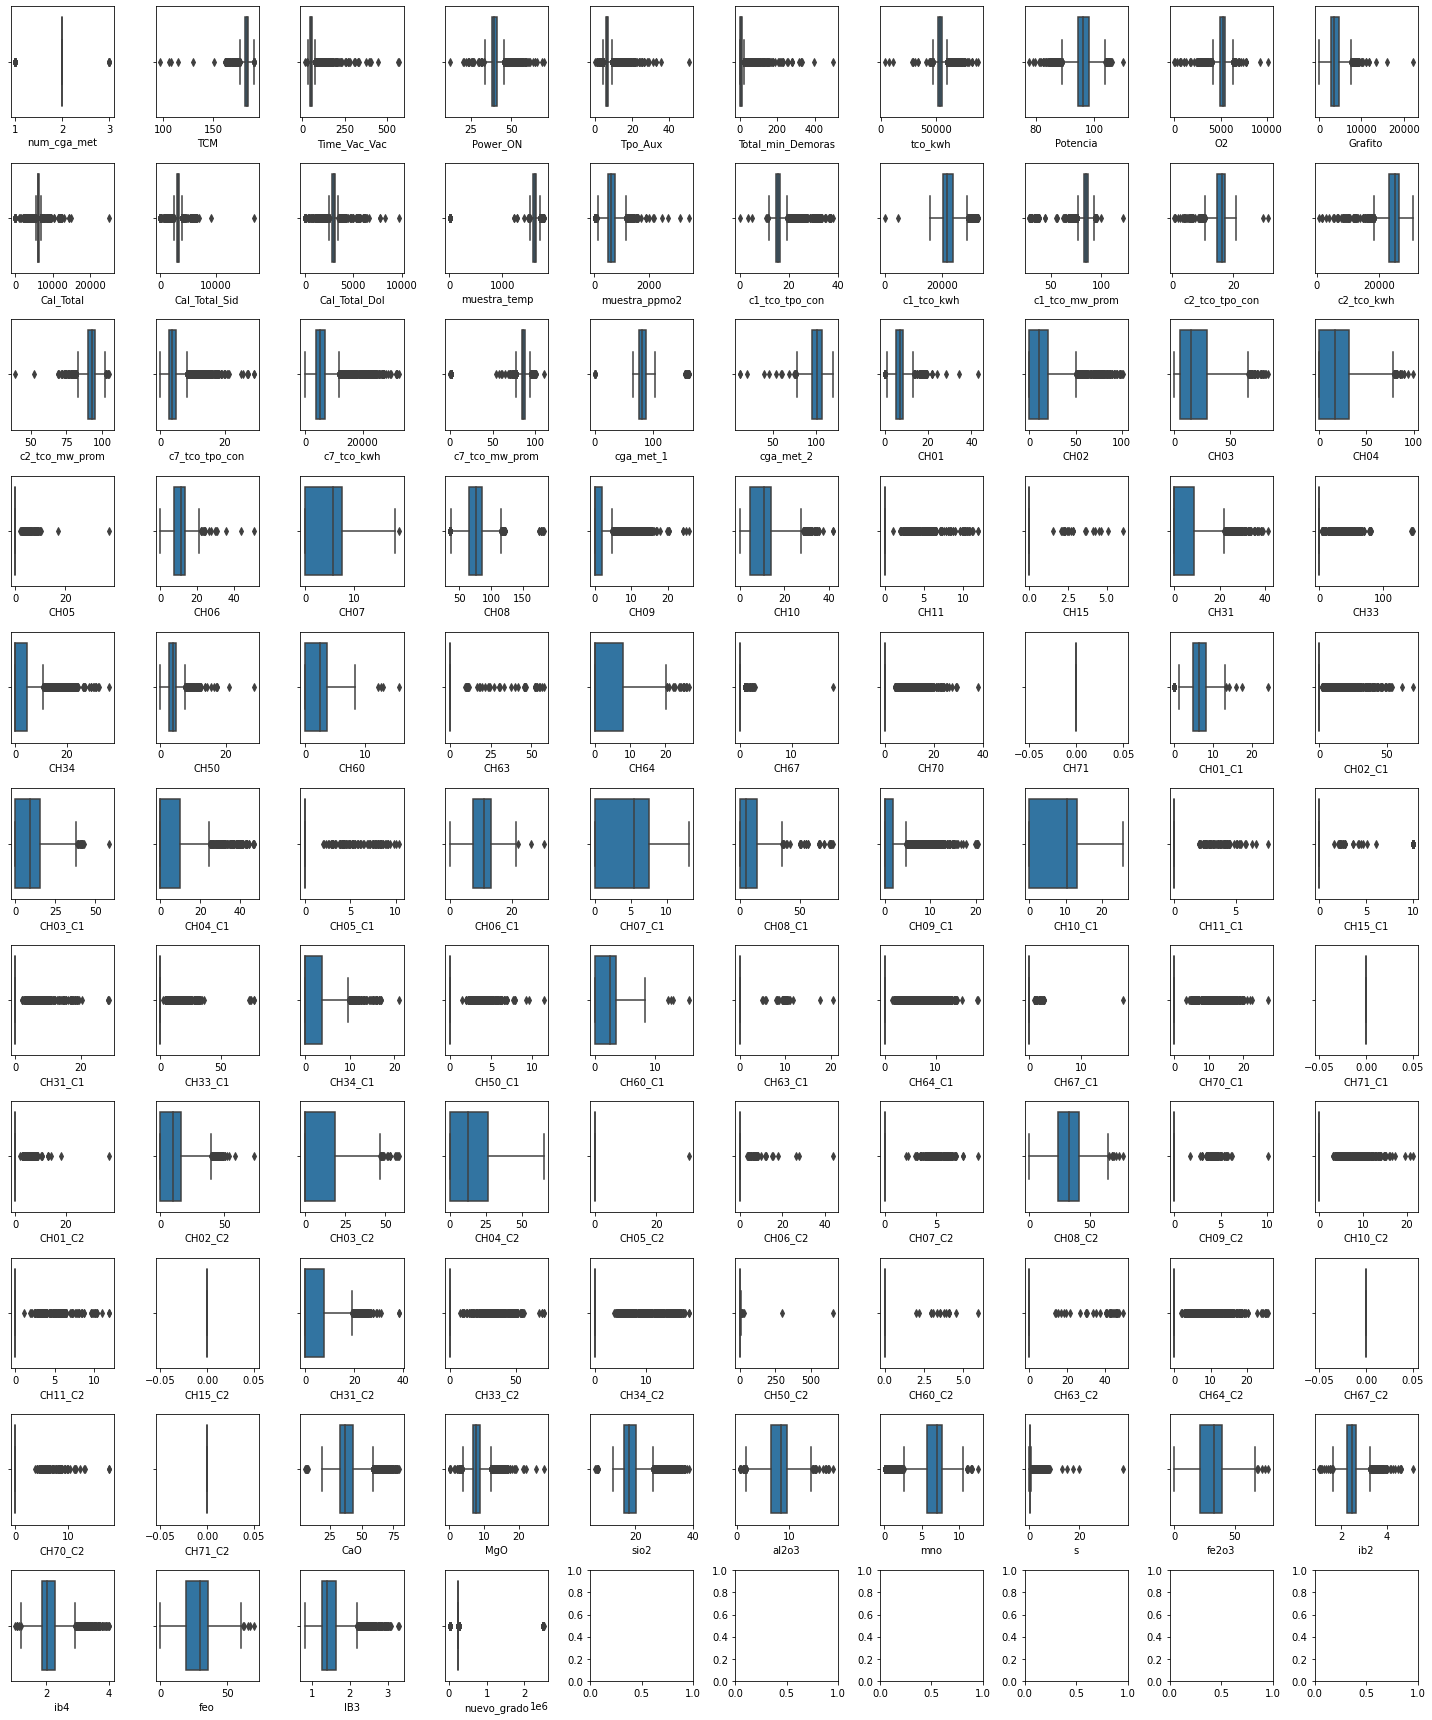

In [15]:
BoxPlot(df_procesado,2).bp()

In [16]:
# Se observan variables con outliers cargados hacia arriba o hacia abajo,
# para eliminar los outliers consideré este sesgo mediante una clase que calcula el rango intercuartil mas un umbral
# Si el sesgo es positivo, el límite superior se define como Q3 + (umbral * IQR),
# Si el sesgo es negativo, el límite inferior se define como Q1 - (umbral * IQR).
# Los datos que caen por encima del valor Q3 + (umbral * IQR) o por debajo de Q1 - (umbral * IQR) 
# se consideran valores atípicos y son reemplazados por los límites superior o inferior, según corresponda

reemplaza_outliers = ReemplazaOutliers(umbral=2)
df_transformado = reemplaza_outliers.fit_transform(df_procesado)


In [17]:
resumen(df_transformado)

,muestra,tipo de dato,porcentaje datos perdidos
id,1.000,float64,0.0
CH08_C2,29.040,float64,0.0
CH06_C2,0.000,float64,0.0
CH05_C2,0.000,float64,0.0
CH04_C2,0.000,float64,0.0
...,...,...,...
CH05,0.000,float64,0.0
CH04,0.000,float64,0.0
CH03,37.895,float64,0.0
CH02,0.000,float64,0.0


#### Visualización después de transformar los outliers

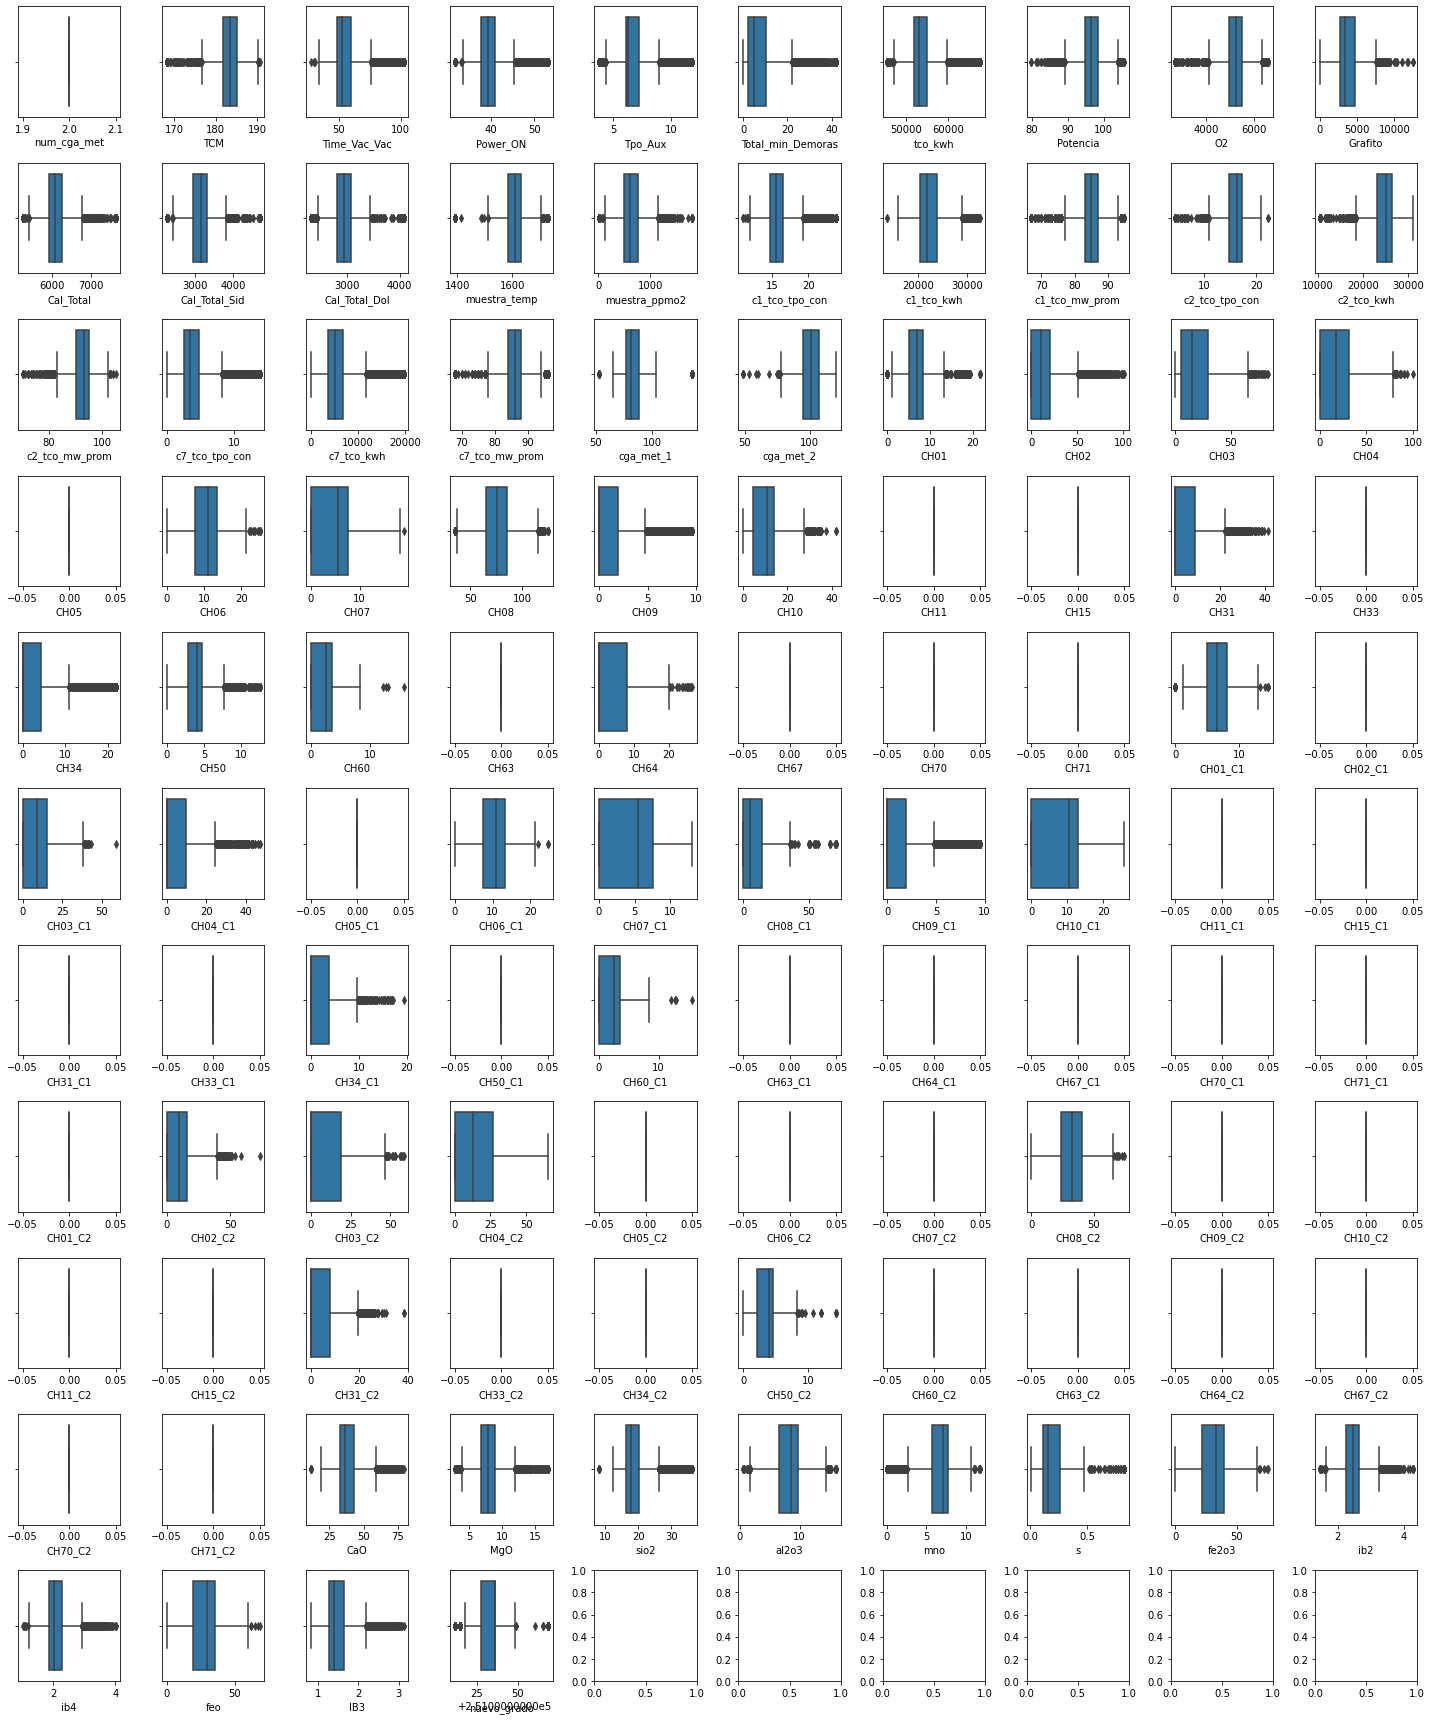

In [18]:
BoxPlot(df_transformado,2).bp()

#### Me interesa conocer el % de registros que cumplen con los rangos esperados de IB3 y FeO, por ser condicionantes de generación 
#### de escoria espumosa

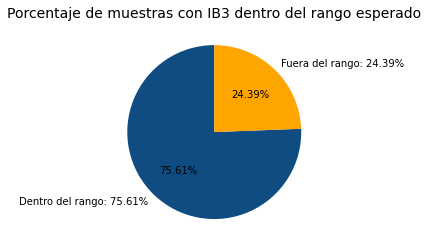

In [100]:
# Registros que tuvieron un IB3 dentro del rango esperado
df_IB3 = df_transformado.loc[(df_transformado['IB3'] >= 1.1) & (df_transformado['IB3']<=1.8)].copy()
porcentaje=len(df_IB3) / df_transformado.shape[0]*100
faltante = 100 - porcentaje

# Define los colores de los sectores de la gráfica
colores = ['#0F4C81', '#FFA500']

# Define los títulos de los sectores de la gráfica
titulos = [f'Dentro del rango: {porcentaje:.2f}%', f'Fuera del rango: {faltante:.2f}%']

# Grafica la gráfica de pastel
plt.pie([porcentaje, faltante], labels=titulos, colors=colores, autopct='%1.2f%%', startangle=90)

# Agrega el título de la gráfica
plt.title("Porcentaje de muestras con IB3 dentro del rango esperado", fontsize=14)

# Muestra la gráfica
plt.show()


In [101]:
###  Estadísticas del tiempo promedio de fundición por grado de acero
# Establecer la cantidad de decimales a mostrar
decimales = 2
# Instanciar la clase
tabla=Horno(df_transformado, decimales)
tabla.mostrar_tabla()


+--------+----------------+-------------+----------+----------+-----------------------+------------+---------+---------+
| Grado  | TiempoPromFund | DesvestFund | p25%Fund | p75%Fund | Consumo_prom_potencia | DesvestPot | p25%Pot | p75%Pot |
+--------+----------------+-------------+----------+----------+-----------------------+------------+---------+---------+
| 251012 |     58.19      |    13.63    |  49.80   |  60.98   |         95.52         |    2.93    |  94.09  |  97.18  |
| 251015 |     57.22      |    13.04    |  48.89   |  59.32   |         96.39         |    3.41    |  94.68  |  97.97  |
| 251018 |     57.94      |    13.59    |  49.03   |  59.46   |         95.51         |    3.84    |  93.31  |  97.38  |
| 251020 |     56.23      |    11.30    |  48.85   |  62.42   |         94.24         |    2.63    |  93.45  |  95.73  |
| 251024 |     48.40      |     nan     |  48.40   |  48.40   |         98.77         |    nan     |  98.77  |  98.77  |
| 251025 |     59.44      |    1

In [102]:
# Buscar los registros que cumplen con los rangos esperados de IB3 y de FeO
# Crea un primer dataframe con los registros que cumplen con el rango de IB3
df_selector = DataframeSelector(df_transformado)

# Filtra el df IB3 para registros que cumplen con FeO
filtrado_df = df_selector.selecciona()

# Mostrar el dataframe filtrado
filtrado_df.head(3)

,id,heat_num,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,...,sio2,al2o3,mno,s,fe2o3,ib2,ib4,feo,IB3,nuevo_grado
57,58.0,463559.0,2.0,177.695999,53.716663,39.666664,11.483333,1.566666,54425.0,97.750000,...,18.7502,12.2012,9.4164,0.1062,21.9480,2.331798,1.745928,19.773024,1.197103,251015.0
117,118.0,463847.0,2.0,180.979004,54.883331,41.199997,6.603333,6.080000,54485.0,94.059998,...,19.7532,11.8826,8.6730,0.0944,19.5998,2.439650,1.907116,17.657520,1.290936,251068.0
259,260.0,464256.0,2.0,180.707993,49.916664,37.099998,7.366666,4.450000,51335.0,99.009987,...,20.8506,8.0830,10.3132,0.0826,22.1132,2.179696,1.915376,19.921822,1.331158,251036.0


#### Vemos las estadísticas descriptivas de estos registros filtrados

In [22]:
filtrado_df.describe()

,id,heat_num,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,...,sio2,al2o3,mno,s,fe2o3,ib2,ib4,feo,IB3,nuevo_grado
count,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2683.535714,476022.714286,2.0,182.354486,57.162854,41.031784,6.694107,8.150058,54913.616071,95.443748,...,18.925514,11.227279,7.690439,0.147500,20.769686,2.576758,1.983626,18.711426,1.371913,251033.303571
std,1597.855358,7620.768865,0.0,3.148694,11.649199,3.973927,1.277353,8.745655,4244.446771,3.372228,...,1.240697,1.771963,1.103304,0.035791,1.148045,0.273917,0.203168,1.034276,0.148514,9.663276
min,58.000000,463559.000000,2.0,168.127245,45.599995,36.049999,5.416666,0.400000,49855.000000,86.769997,...,15.977200,7.327800,5.333600,0.070800,17.829800,2.120460,1.643976,16.062868,1.136303,251012.000000
25%,1344.750000,469840.750000,2.0,181.074745,49.891664,38.316666,6.020833,3.037499,52320.000000,93.962502,...,18.390300,9.879550,6.967900,0.129800,20.178000,2.425107,1.825017,18.178372,1.263806,251034.000000
50%,2625.000000,475884.500000,2.0,183.038002,53.749996,40.008331,6.300000,4.974999,53510.000000,95.604992,...,19.015700,11.322100,7.634600,0.141600,21.080700,2.558063,1.967591,18.991628,1.342471,251036.000000
75%,3940.500000,483581.250000,2.0,184.624500,60.045830,41.949998,7.200000,9.254166,56230.000000,97.130003,...,19.531950,12.407700,8.354400,0.165200,21.694300,2.700430,2.115268,19.544458,1.442973,251036.000000
max,5362.000000,487390.000000,2.0,185.878998,99.133324,53.133323,11.816667,41.949998,67722.500000,102.980003,...,21.889000,15.930000,11.151000,0.236000,22.172200,3.498464,2.529920,19.974922,1.760971,251068.000000


#### Las cales que se añaden también favorecen la creación de escoria espumosa por lo que interesa conocer su patrón

In [103]:
# seleccionar los datos de cales añadidas de las muestras que estuvieron dentro del rango esperado de IB3 y de FeO
df_cales = filtrado_df[['O2', 'Grafito', 'Cal_Total_Sid', 'Cal_Total_Dol']]

# Media y desviación estándar de los elementos añadidos al acero líquido, 
media = df_cales.mean()
desv_est = df_cales.std()

# crear un nuevo dataframe con la información calculada
df_resumen = pd.DataFrame({'media': media, 'desv_est': desv_est})
df_resumen

,media,desv_est
O2,5171.590402,697.721126
Grafito,3774.017857,1488.704587
Cal_Total_Sid,3103.589286,387.948533
Cal_Total_Dol,2949.053571,256.085243


El 1.19 por ciento de las muestras de escoria espumosa tienen en su composición la cantidad de FeO esperado,  es decir, de 16 a 20 


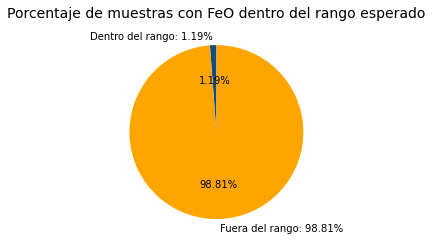

In [96]:
df_FeO=df_transformado.loc[(df_transformado['feo'] >= 16) & (df_transformado['feo']<=20)].copy()
porcentaje=len(df_FeO) / df_transformado.shape[0]*100
print(f'El{porcentaje: .2f} por ciento de las muestras de escoria espumosa tienen en su composición la cantidad de FeO esperado,  es decir, de 16 a 20 ')
faltante = 100 - porcentaje
# Define los colores de los sectores de la gráfica
colores = ['#0F4C81', '#FFA500']

# Define los títulos de los sectores de la gráfica
titulos = [f'Dentro del rango: {porcentaje:.2f}%', f'Fuera del rango: {faltante:.2f}%']

# Grafica la gráfica de pastel
plt.pie([porcentaje, faltante], labels=titulos, colors=colores, autopct='%1.2f%%', startangle=90)

# Agrega el título de la gráfica
plt.title("Porcentaje de muestras con FeO dentro del rango esperado", fontsize=14)

# Muestra la gráfica
plt.show()

#### Buscamos correlaciones entre variables

In [107]:
#Para calcular las correlaciones quitaré las columnas id y heat_num pues son identificadores de cada registro
temporal=filtrado_df.copy()
temporal=temporal.drop(['id', 'heat_num'], axis=1)

#Creo una instancia de la clase constructora del mapa de correlaciones
corr_heatmap = Correlaciones(alpha=0.05, cmap='coolwarm')

# Calcula las correlaciones significativas
significativa = corr_heatmap.fit_transform(temporal)

          Variable 1      Variable 2  Correlación
0         c2_tco_kwh      c1_tco_kwh    -0.947981
1         c1_tco_kwh      c2_tco_kwh    -0.947981
2     c2_tco_tpo_con      c1_tco_kwh    -0.920630
3         c1_tco_kwh  c2_tco_tpo_con    -0.920630
4          cga_met_1       cga_met_2    -0.892749
...              ...             ...          ...
4351  c7_tco_tpo_con      c7_tco_kwh     0.997691
4352         tco_kwh      c7_tco_kwh     0.998501
4353      c7_tco_kwh         tco_kwh     0.998501
4354             feo           fe2o3     1.000000
4355           fe2o3             feo     1.000000

[1122 rows x 3 columns]


#### Dado que el Óxido de Magnesio y el Óxido de Hierro son favorecedores de la escoria espumosa, obtendré los deciles de estas variables
#### para sugerir que se estudien los cantidades de cales y demás elementos (todas las variables) presentes en los mayores deciles con datos

In [109]:
# Obtener los deciles del Óxido de Magnesio para buscar las muestras con la mayor concentración
deciles_MgO = pd.qcut(df['MgO'], q=10, labels=False)
# Obtener los deciles del Óxido de Hierro para buscas las muestras con la menor concentración
deciles_FeO = pd.qcut(df['feo'], q=10, labels=False)

In [110]:
temporal['dec_MgO']=deciles_MgO
temporal['dec_FeO']=deciles_FeO

In [111]:
temporal.head(2)

,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,O2,Grafito,...,mno,s,fe2o3,ib2,ib4,feo,IB3,nuevo_grado,dec_MgO,dec_FeO
57,2.0,177.695999,53.716663,39.666664,11.483333,1.566666,54425.0,97.750000,5181.25,3045.0,...,9.4164,0.1062,21.9480,2.331798,1.745928,19.773024,1.197103,251015.0,7,2
117,2.0,180.979004,54.883331,41.199997,6.603333,6.080000,54485.0,94.059998,5660.00,3025.0,...,8.6730,0.0944,19.5998,2.439650,1.907116,17.657520,1.290936,251068.0,9,2


#### Los deciles más altos con valores fueron el 9 para el MgO y el 2 para el FeO
#### Mi sugerencia es estudiar el patrón en estos registros

In [125]:
df_mejorMgO=temporal[temporal['dec_MgO'] == 9]
df_mejorFeO=temporal[temporal['dec_FeO'] == 2]

In [97]:
df_mejorMgO

,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,O2,Grafito,...,mno,s,fe2o3,ib2,ib4,feo,IB3,nuevo_grado,dec_MgO,dec_FeO
117,2.0,180.979004,54.883331,41.199997,6.603333,6.080000,54485.0,94.059998,5660.00,3025.00,...,8.6730,0.0944,19.5998,2.439650,1.907116,17.657520,1.290936,251068.0,9,2
1037,2.0,183.613007,52.049999,39.566666,7.200000,4.283332,52275.0,94.279999,5400.00,6216.25,...,5.3336,0.1534,20.9450,3.498464,2.529920,18.869380,1.760971,251046.0,9,2
1124,2.0,184.820999,55.349998,42.616665,7.200000,4.533333,56795.0,94.459999,5898.75,3121.25,...,6.8794,0.1298,20.6972,2.605676,2.177100,18.646124,1.402645,251036.0,9,2
1125,2.0,184.917008,49.816662,40.383331,7.016666,1.416666,54305.0,95.689987,5522.50,4111.25,...,6.7614,0.1416,21.8064,2.767336,2.322240,19.645348,1.496059,251036.0,9,2
1342,2.0,181.738998,56.849998,46.566666,7.200000,2.083333,60065.0,91.099998,6398.75,7827.50,...,8.5314,0.0944,21.6884,2.224064,1.889652,19.539148,1.200474,251036.0,9,2
1343,2.0,177.761993,89.316666,40.583332,5.666666,41.949998,52155.0,91.769997,5638.75,2705.00,...,8.0594,0.1180,21.2990,2.401654,2.070900,19.188334,1.339992,251036.0,9,2
1344,2.0,177.634003,51.216663,41.516663,5.633333,3.066666,53475.0,91.669998,5993.75,6100.00,...,7.9768,0.1062,21.0866,2.383246,2.080340,18.996938,1.330894,251036.0,9,2
1347,2.0,181.022995,57.316662,39.866665,7.200000,9.249999,51805.0,92.820000,5535.00,4675.00,...,11.1510,0.1062,18.2310,2.503960,2.192794,16.424302,1.390700,251015.0,9,2
1387,2.0,182.503006,64.366665,43.616665,7.200000,12.550000,54495.0,88.989998,5241.25,5910.00,...,6.2068,0.2360,19.8830,2.304304,2.122584,17.912636,1.319427,251036.0,9,2
5281,2.0,185.375000,99.133324,53.133323,7.700000,32.099997,67722.5,90.500000,3233.75,2871.25,...,7.6818,0.1298,18.9036,2.528386,2.096388,17.030232,1.331670,251036.0,9,2


In [126]:
df_mejorFeO

,num_cga_met,TCM,Time_Vac_Vac,Power_ON,Tpo_Aux,Total_min_Demoras,tco_kwh,Potencia,O2,Grafito,...,mno,s,fe2o3,ib2,ib4,feo,IB3,nuevo_grado,dec_MgO,dec_FeO
57,2.0,177.695999,53.716663,39.666664,11.483333,1.566666,54425.0,97.750000,5181.2500,3045.00,...,9.4164,0.1062,21.9480,2.331798,1.745928,19.773024,1.197103,251015.0,7,2
117,2.0,180.979004,54.883331,41.199997,6.603333,6.080000,54485.0,94.059998,5660.0000,3025.00,...,8.6730,0.0944,19.5998,2.439650,1.907116,17.657520,1.290936,251068.0,9,2
259,2.0,180.707993,49.916664,37.099998,7.366666,4.450000,51335.0,99.009987,5173.7500,2602.50,...,10.3132,0.0826,22.1132,2.179696,1.915376,19.921822,1.331158,251036.0,6,2
294,2.0,185.878998,61.349998,48.399998,8.600000,3.350000,64215.0,93.290001,4531.2500,4710.00,...,8.4252,0.1416,21.9716,2.966874,2.451096,19.794264,1.721395,251028.0,7,2
306,2.0,182.160996,47.099998,39.599998,6.100000,0.400000,53465.0,96.209999,5282.5000,2737.50,...,8.6258,0.0708,20.4848,2.299466,1.961160,18.454728,1.327125,251028.0,8,2
384,2.0,175.212997,50.049992,38.766663,6.233333,4.049998,52725.0,97.050003,5621.2500,1210.00,...,7.7880,0.1770,21.8890,2.773472,2.321178,19.719806,1.683272,251012.0,3,2
730,2.0,182.931000,58.233330,45.366665,6.666666,5.199998,61275.0,95.320000,6050.0000,4105.00,...,9.4046,0.1534,21.3698,2.887342,2.209904,19.252054,1.658854,251015.0,0,2
731,2.0,183.235992,56.566666,41.799999,7.233333,6.533333,56785.0,96.500000,5456.2500,4080.00,...,9.5580,0.1534,20.4848,2.671992,2.102406,18.454728,1.532049,251015.0,3,2
756,2.0,168.127245,64.616665,48.666664,8.600000,6.350000,59725.0,86.769997,4197.5000,4066.25,...,9.0388,0.2360,17.8298,2.120460,1.866642,16.062868,1.261350,251036.0,8,2
1037,2.0,183.613007,52.049999,39.566666,7.200000,4.283332,52275.0,94.279999,5400.0000,6216.25,...,5.3336,0.1534,20.9450,3.498464,2.529920,18.869380,1.760971,251046.0,9,2


# Fin del ejercicio